In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston, load_iris
from sklearn.linear_model import LinearRegression,Ridge,SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

import mglearn
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

import warnings
warnings.simplefilter('ignore')

## [예제]
- quiz1, quiz2, midterm을 통해 final 예측

In [5]:
df = pd.read_csv( '../data/data4/data-01.csv' , header=None )
df.columns = ['quiz1', 'quiz2', 'midterm','final' ]
df.head()

,quiz1,quiz2,midterm,final
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142


# 1. 다중선형회귀
- np.matmul( )
- $ (x1, x2, x3) * (w1, w2, w3)= ( x1w1 + x2w2 + x3w3 )   $
- (n행 1열) x (1행 n열)

## (1) features선정
- 반드시 **matrix**(2차원 데이터)로 features줘야한다.


- DataFrame.iloc 사용
- DataFrame.**columns**.**difference**( [컬럼이름] )
    - [컬럼이름]을 제외한 컬럼을 출력

In [19]:
x_data = df.iloc[:, :-1] # features
x_data.head()

,quiz1,quiz2,midterm
0,73,80,75
1,93,88,93
2,89,91,90
3,96,98,100
4,73,66,70


In [68]:
y_data = df.iloc[:,-1] # label
y_data.head()

0    152
1    185
2    180
3    196
4    142
Name: final, dtype: int64

In [18]:
df.columns.difference( ['final']) # features

Index(['midterm', 'quiz1', 'quiz2'], dtype='object')

## (2) 모델 생성

In [69]:
model_lr = LinearRegression()
model_lr.fit( x_data, y_data )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
model_lr.coef_ # q1, q2, midterm에 대한 w값

array([0.35593822, 0.54251876, 1.16744422])

In [71]:
model_lr.intercept_ # b값

-4.3361024012403675

## (3) 예측
- matmul
    - (1행 3열) x (3행 1열)

### [연습문제1]
- quiz1=70, quiz2=75, midterm=75인 경우 final 예측값

### i  직접 수식으로 구하기

In [72]:
model_lr.coef_[0]*70 + model_lr.coef_[1]*75 + model_lr.coef_[2]*75 + model_lr.intercept_

148.8267959476565

### ii predict사용하기

In [73]:
model_lr.predict( [[70,75,75]] ) # 반드시 matrix로 x값 주기

array([148.82679595])

In [74]:
np.matmul( [[70,75,75]] , model_lr.coef_.reshape(-1,1)) +  model_lr.intercept_

array([[148.82679595]])

In [46]:
np.array([[70,75,75]]).shape , model_lr.coef_.reshape(-1,1).shape

((1, 3), (3, 1))

### [연습문제2]
    # q1:60점 q2:55점 midterm:65 
    # q1:90점 q2:85점 midterm:95  인경우 예측값을 구하시오

In [56]:
model_lr.predict( [ [60,55,65], [90,85,95] ] ) # x값이 2행 3열

array([122.74259645, 184.71963222])

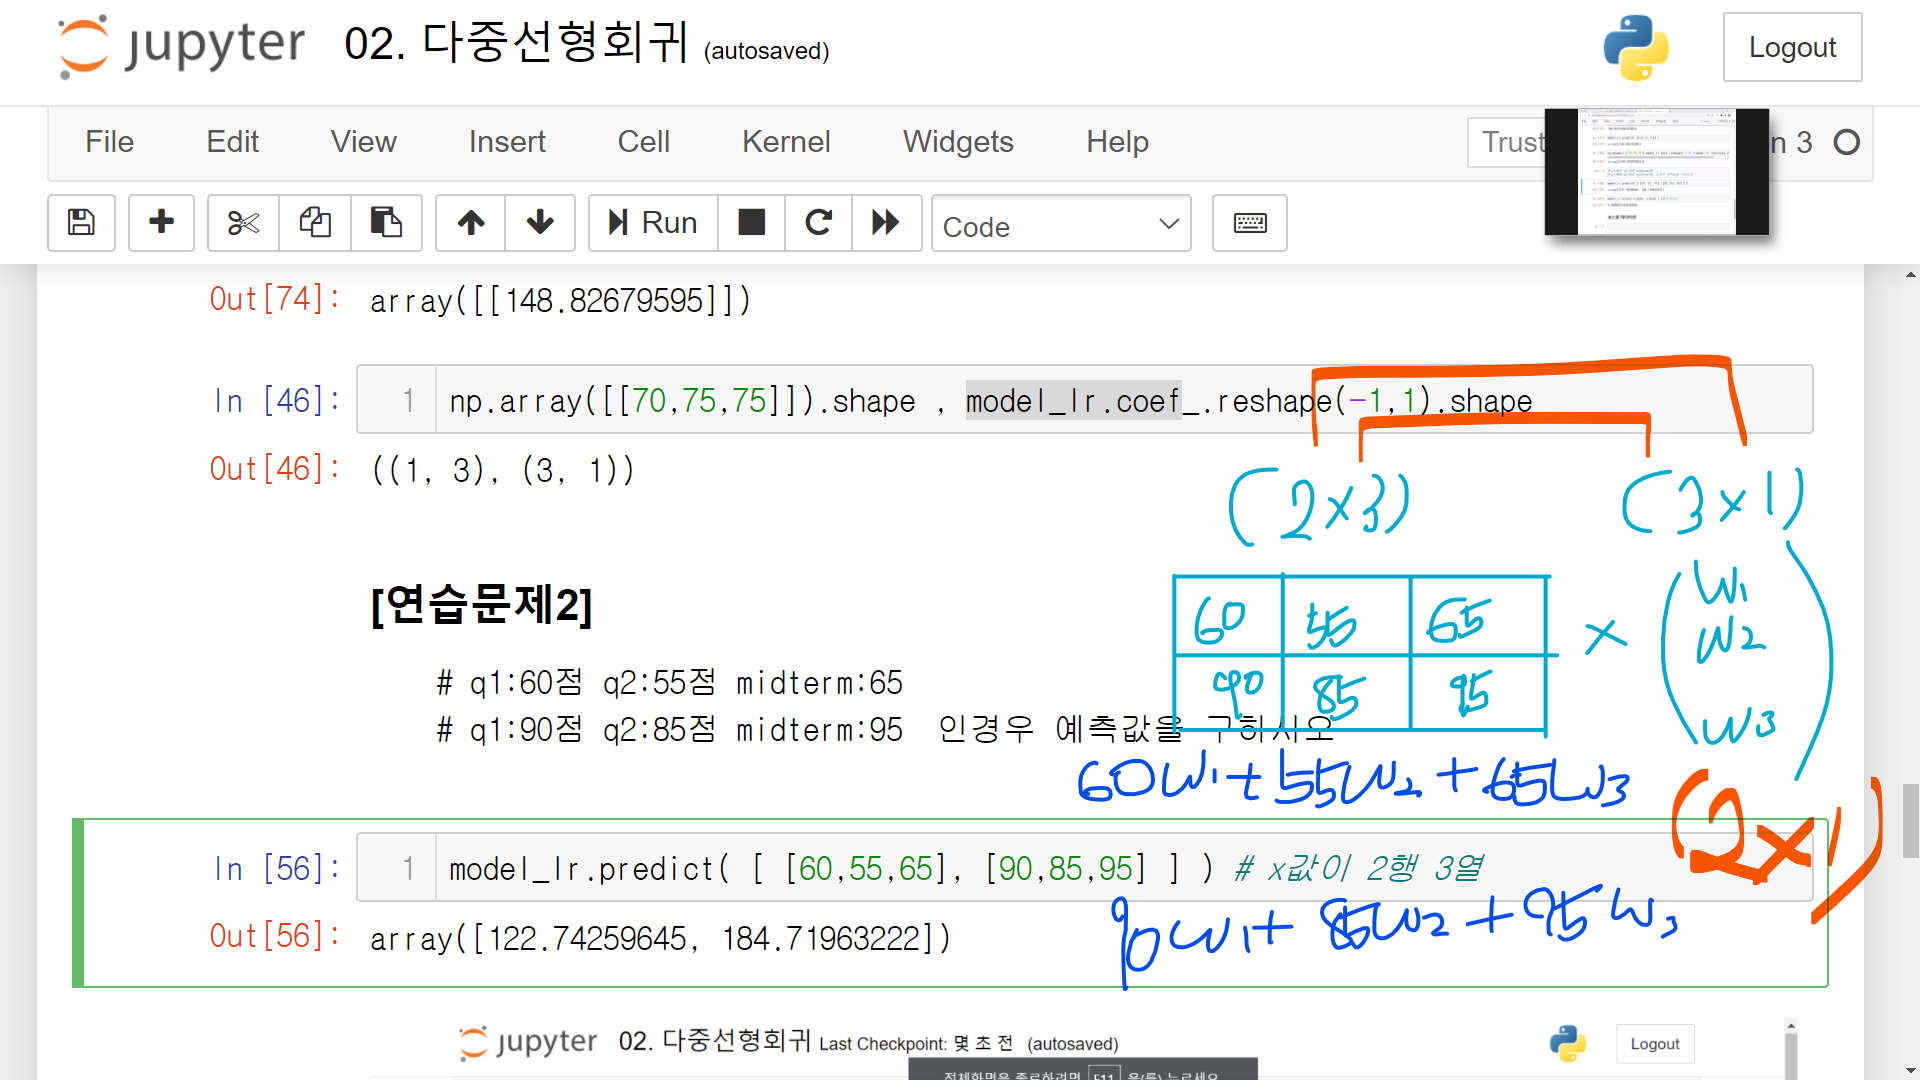

## (4)  회귀모델 검증
- 결정계수 
    - model_lr.score
    - r2_score

In [61]:
model_lr.score( x_data, y_data )

0.98966157894484

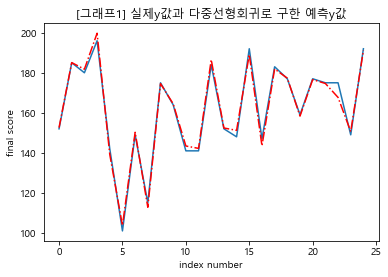

In [92]:
plt.plot( y_data ) # 실제 y값
plt.plot( model_lr.predict(x_data ), 'r-.')  # 예측 y값

plt.title('[그래프1] 실제y값과 다중선형회귀로 구한 예측y값')
plt.xlabel('index number')
plt.ylabel('final score')
plt.show()

# [예제] Boston data set
- 보스턴 주택 가격
- medv가 타겟

In [100]:
boston = load_boston()
boston # 딕셔너리

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [102]:
boston.keys() # 각 키 속에 narray로 구성

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [107]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [111]:
boston['DESCR'].split('\n')

['.. _boston_dataset:',
 '',
 'Boston house prices dataset',
 '---------------------------',
 '',
 '**Data Set Characteristics:**  ',
 '',
 '    :Number of Instances: 506 ',
 '',
 '    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.',
 '',
 '    :Attribute Information (in order):',
 '        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial highways

## (1)  데이터프레임으로 변환

In [112]:
boston_df = pd.DataFrame( boston['data'], columns=boston['feature_names'])
boston_df['MEDV'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [113]:
len( boston_df.columns ) # features는 13개, label은 1개

14

In [118]:
boston_df.shape # 506행, 14열

(506, 14)

## (2) training, testing 데이터 구분

In [139]:
# x_data =boston_df[ boston_df.columns.difference(['MEDV'])]
x_data = boston_df.iloc[:,:-1]
x_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [140]:
y_data = boston_df.iloc[:,-1]
y_data.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [209]:
train_x, test_x, train_y, test_y = train_test_split(
                                        x_data, # features
                                        y_data, # label
                                        test_size = 0.2,
                                        train_size = 0.8,
                                        random_state=1, # seed값 부여( 강사님과 같은 자료 사용하도록 )
                                                    )

In [210]:
# train, test features
train_x.shape, test_x.shape

((404, 13), (102, 13))

In [211]:
# train, test label
train_y.shape, test_y.shape

((404,), (102,))

## (3) 모델 생성

In [212]:
model_boston = LinearRegression()
model_boston.fit( train_x, train_y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [213]:
# train 데이터의 결정계수
print( '훈련 데이터 R2:', model_boston.score( train_x, train_y ) )

print( '테스트 데이터 R2:', model_boston.score( test_x, test_y ))

# 만얀 훈련데이터가 테스트데이터보다 R2값이 높으면 과대적합의 가능성 - 학습의 경우!
# 하지만 지금 우리가 사용하는 LinearRegression은 공식을 통해 사용 -> 개선 가능성 x

훈련 데이터 R2: 0.7293585058196337
테스트 데이터 R2: 0.7634174432138457


## (4) 예측

In [214]:
# test데이터 셋에서 1행을 features로 줬을 때 medv값
model_boston.predict( [test_x.iloc[0,:]] ) 

array([32.65503184])

# 2. 머신러닝-학습을 통한 선형회귀
- x값
    - 반드시 x값을 데이터프레임, 행렬로 주기

In [215]:
modelSGD = SGDRegressor(
                loss='squared_loss',  # mean squared error
                alpha=0.0001,  # learn rate
                max_iter=100, # 학습 횟수
                early_stopping=True,  # cost값에 변화가 없다(학습 충분)면 최저점에 도달했다고 인식
                verbose=0, # 학습횟수와 learn rate등을 출력하는 인자
                    )

In [216]:
modelSGD.fit( train_x, train_y )

SGDRegressor(alpha=0.0001, average=False, early_stopping=True, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=100,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [217]:
modelSGD.score( train_x, train_y )

-1.0825729654937068e+26

In [218]:
modelSGD.score( test_x, test_y)

-8.7520540688803e+25

# 3. 딥러닝

In [219]:
# 딥러닝
modelNN = MLPRegressor( 
                        hidden_layer_sizes=(100,10),  
                        solver='adam',  
                        alpha=0.1,  
                        max_iter=5000,  
                        verbose=0,  
                        )
modelNN.fit( train_x, train_y )
print( modelNN.score( train_x, train_y) )

print( modelNN.score(test_x, test_y) )

0.29046472613462215
0.2342622897550426


# 4. 정규화
- 머신러닝, 딥러닝을 통한 학습과 다중 선형 회귀시 고려사항
    - featurs 정규화
    - 다중공선성
        - 상관관계 확인
        

- 학습을 통한 회귀는 **반드시** 정규화 실행
- 각 feature마다 **단위** 갭이 크기 때문

## (1) StandardScaler로 정규화한 후 머신러닝

In [252]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler # 정규화 방법 2가지

In [253]:
scaleX  = StandardScaler()
x_dataS = scaleX.fit_transform( x_data ) # x_data 정규화하기

In [254]:
x_dataS.shape

(506, 13)

In [255]:
train_xS, test_xS, train_yS, test_yS = train_test_split(
                                        x_dataS, # features
                                        y_data, # label
                                        test_size = 0.2,
                                        train_size = 0.8,
                                        random_state=1, # seed값 부여( 강사님과 같은 자료 사용하도록 )
                                                    )

In [260]:
# 머신러닝
modelSGD_S = SGDRegressor(
                            loss='squared_loss',  
                            alpha=0.0001,   
                            max_iter=100,  
                            early_stopping=True,  
                            verbose=0, 
                          )

modelSGD_S.fit( train_xS, train_yS )
print( modelSGD_S.score( train_xS, train_yS ) )
print( modelSGD_S.score( test_xS, test_yS ) )

0.723371632267563
0.7595934690105253


## (2) StandardScaler로 정규화한 후 딥러닝

In [259]:
# 딥러닝
modelNN_S = MLPRegressor( 
                        hidden_layer_sizes=(100,10),  
                        solver='adam',  
                        alpha=0.1,  
                        max_iter=5000,  
                        verbose=0,  
                        )
modelNN_S.fit( train_xS, train_yS )
print( modelNN_S.score( train_xS, train_yS ) )

print( modelNN_S.score(test_xS, test_yS) )

0.8504292301797395
0.8876494331987611


In [258]:
test_xS[0] # x_data 중 첫번 째 행을 feaature로 줘서 예측을 하고 싶음 -> "정규화"한 데이터로 사용해야함!

array([-0.41477789,  0.92862338, -1.30687771, -0.27259857, -0.71434722,
        0.80402837,  0.0613455 , -0.29108882, -0.29308074, -1.10611514,
       -0.02567665,  0.44105193, -0.71811916])

In [251]:
modelSGD_S.predict( [test_xS[0]] )

array([30.86408668])